# Fourier Transform and Spectral Analyses Lab

## Aliasing Errors

Aliasing occurs when a signal is sampled at a rate insufficient to capture its highest frequency components, causing high-frequency components to appear as lower frequencies.
In this section, we will demonstrate aliasing and determine the minimum sampling rate needed to avoid it.

Setup:
1. Generate a sinusoidal signal $s(t) = \cos(2\pi t)$.
2. Sample the signal at different rates and visualize the effect.

In [ ]:
import numpy as np

import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend for plotting
import matplotlib.pyplot as plt


class CoupledOscillators:
    """A class to model and simulate a system of coupled harmonic
    oscillators.

    Attributes:
        Omega (np.ndarray): Array of angular frequencies of the normal modes.
        V (np.ndarray): Matrix of eigenvectors representing normal modes.
        M0 (np.ndarray): Initial amplitudes of the normal modes.

    """

    def __init__(self, X0=[-0.5, 0, 0.5], m=1.0, k=1.0):
        """Initialize the coupled harmonic oscillator system.

        Args:
            X0 (list or np.ndarray): Initial displacements of the oscillators.
            m (float): Mass of each oscillator (assumed identical).
            k (float): Spring constant (assumed identical for all springs).

        """
        self.X0 = X0
        self.m = m
        self.k = k

        self.N = len(self.X0)
        # TODO: Construct the stiffness matrix K
        self.K = (np.diag(np.repeat(2*k/m, self.N  )    ) +
                  np.diag(np.repeat(- k/m, self.N-1), +1) +
                  np.diag(np.repeat(- k/m, self.N-1), -1) ) 

        # TODO: Solve the eigenvalue problem for K to find normal modes
        self.Omega2, self.V = np.linalg.eig(self.K)
        # TODO: Store angular frequencies and eigenvectors
        self.Omega = np.sqrt(self.Omega2)
        # TODO: Compute initial modal amplitudes M0 (normal mode decomposition)
        self.M0 = self.V.T @ X0
    def __call__(self, t):
        """Calculate the displacements of the oscillators at time t.

        Args:
            t (float): Time at which to compute the displacements.

        Returns:
            np.ndarray: Displacements of the oscillators at time t.

        """
        # TODO: Reconstruct the displacements from normal modes
        return self.V @ (self.M0 * np.cos(self.Omega * t))

if __name__ == "__main__":
    # Define the time array for simulation
    T = np.linspace(0, 10, num=101)

    # Initialize the coupled oscillator system with default parameters
    co = CoupledOscillators()

    # Print displacements of the oscillators at each time step
    print("Time(s)  Displacements")
    print("----------------------")
    for t in T:
        X = co(t)  # Compute displacements at time t

        print(f"{t:.2f}", X)  # Print values for reference

@pytest.mark.parametrize('params', [
    # Test cases with varying numbers of oscillators (N) and expected results (X1)
    {'N':2,  'X1':[0.17521471,0.09493644]},
    {'N':4,  'X1':[0.00060096,0.01698677,0.1758158 ,0.09494753]},
    {'N':8,  'X1':[5.36460880e-12,9.66325041e-10,1.25763949e-07,1.10888098e-05,
                   6.01088717e-04,1.69867701e-02,1.75815800e-01,9.49475297e-02]},
    {'N':16, 'X1':[1.32933324e-16,-3.11747666e-17,-4.10060005e-17,-4.85503047e-17,
                   8.74352901e-17, 5.24443263e-18, 1.21991521e-16, 2.24148784e-14,
                   5.36485433e-12, 9.66324942e-10, 1.25763949e-07, 1.10888098e-05,
                   6.01088717e-04, 1.69867701e-02, 1.75815800e-01, 9.49475297e-02]},
])
def test_Oscillators(params):
    """
    Test the CoupledOscillators class for correctness of displacements
    at a fixed time (t=1) for various numbers of oscillators (N).

    Args:
        params (dict): A dictionary containing:
            - 'N': Number of oscillators in the system.
            - 'X1': Expected displacements of the oscillators at t=1.
    """
    # Initial displacements: All zeros except the last oscillator
    X0 = np.zeros(params['N'])
    X0[-1] = 0.5

    # Initialize the CoupledOscillators system
    co = CoupledOscillators(X0)

    # Compute displacements at t=1
    X1 = co(1)

    # Assert that the computed displacements match the expected values
    assert np.allclose(X1, params['X1']), (
        f"Failed for N={params['N']}. "
        f"Expected: {params['X1']}, but got: {X1}"
    )
print(test_Oscillators(params))

In [1]:
from matplotlib import pyplot as plt
import numpy as np

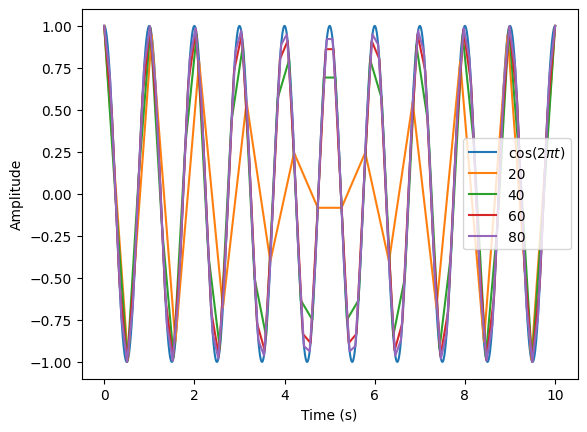

In [16]:
t = np.linspace(0, 10, num=2000) # use very high sampling rate to approximate the analytic function
s = np.cos(2 * np.pi * t) # periodic is 1
plt.plot(t, s, label=r'$\cos(2\pi t)$')

# HANDSON: write a loop to loop over different sampling rates
rates = [20,40,60,80]
for rate in rates:
    t = np.linspace(0, 10, num = rate)
    s = np.cos(2 * np.pi * t)
    plt.plot(t, s, label= [rate])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

`````{exercise}
From the figure, determine the minimal number of sampling points required per period to capture the correct frequency of the signal.

```
HANDSON: Your answer here...
```
`````

## Spectral Filtering

Spectral filtering involves transforming a signal into the frequency domain, modifying specific frequency components (e.g., removing noise), and transforming it back to the time domain.

In this section, we will implement a low-pass filter.
Setup:
1. Generate a noisy sinusoidal signal.
2. Transform the signal into the frequency domain using the Fast Fourier Transform (FFT).
3. Apply a low-pass filter to remove high-frequency noise.
4. Transform the filtered signal back to the time domain.

Text(0, 0.5, 'Amplitude')

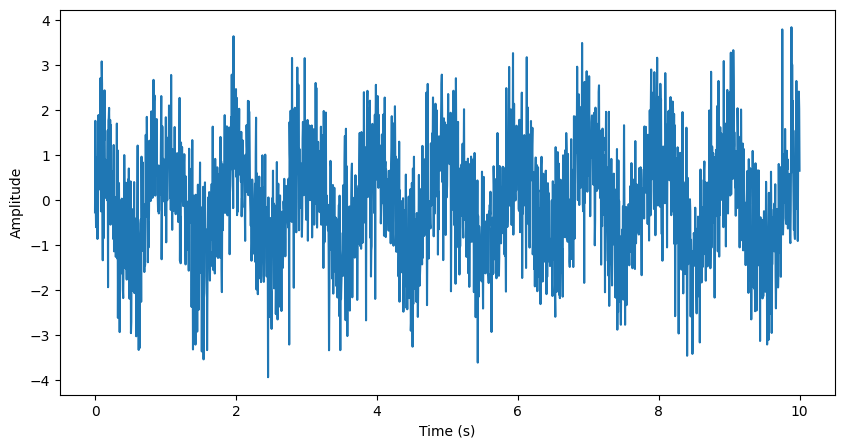

In [17]:
t = np.linspace(0, 10, num=2000) # use very high sampling rate to approximate the analytic function
s = np.cos(2 * np.pi * t) # periodic is 1

# Add noise
noisy = s + np.random.normal(size=t.shape)

# Visualize the signal with noise
plt.figure(figsize=(10, 5))
plt.plot(t, noisy)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Power')

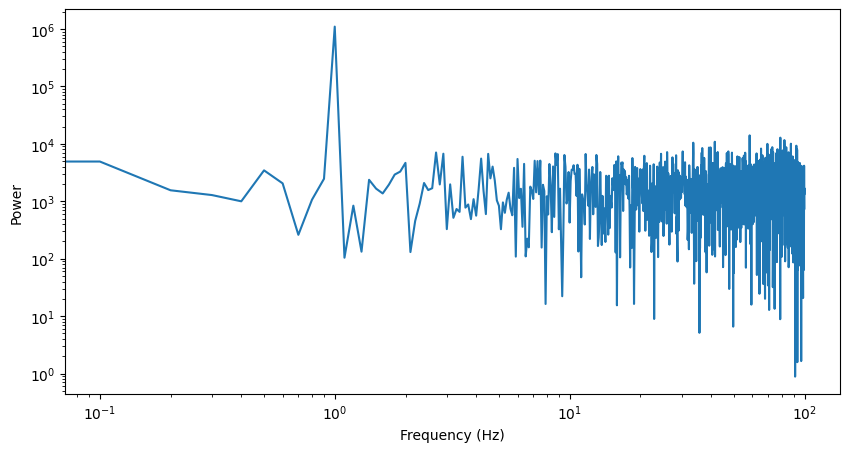

In [18]:
# Fourier Transform
f = np.fft.fftfreq(len(t), d=t[1])
Noisy = np.fft.fft(noisy)
Power = abs(Noisy[:len(t)//2])**2

plt.figure(figsize=(10, 5))
plt.loglog(f[:len(t)//2], Power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

In [ ]:
# HANDSON: implement a low pass filter
# Noisy = [20:]=0

# and inverse Fourier transform
filtered = ...

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(t, noisy, label='Noisy Signal', alpha=0.7)
if filtered is not ...:
    plt.plot(t, filtered, label='Filtered Signal', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()